In [ ]:
"""
run.py: script for executing main functionality of component_separation

"""

__author__ = "S. Belkner"

import os
import sys
import numpy as np
import platform
import json
import component_separation.io as io
import component_separation.run as csr
from component_separation.cs_util import Planckf, Plancks

uname = platform.uname()
if uname.node == "DESKTOP-KMIGUPV":
    mch = "XPS"
else:
    mch = "NERSC"
    
with open('config.json', "r") as f:
    cf = json.load(f)
PLANCKMAPFREQ = [p.value for p in list(Planckf)]
PLANCKSPECTRUM = [p.value for p in list(Plancks)]
lmax = cf['pa']["lmax"]
lmax_mask = cf['pa']["lmax_mask"]
freqfilter = cf['pa']["freqfilter"]
specfilter = cf['pa']["specfilter"]

num_sim = cf['pa']["num_sim"]

spec_path = cf[mch]['outdir']
indir_path = cf[mch]['indir']

freqcomb =  [
    "{}-{}".format(FREQ,FREQ2)
        for FREQ in PLANCKMAPFREQ
        if FREQ not in freqfilter
        for FREQ2 in PLANCKMAPFREQ
        if (FREQ2 not in freqfilter) and (int(FREQ2)>=int(FREQ))]
speccomb  = [spec for spec in PLANCKSPECTRUM if spec not in specfilter]

filename = io.make_filenamestring(cf)

if cf['pa']['new_spectrum']:
    spectrum = csr.map2spec(io.load_plamap(cf['pa']), freqcomb)
    io.save_spectrum(spectrum, spec_path, 'unscaled'+filename)
else:
    path_name = spec_path + 'spectrum/unscaled' + filename
    spectrum = io.load_spectrum(path_name=path_name)
if spectrum is None:
    spectrum = csr.map2spec(io.load_plamap(cf['pa']), freqcomb)
    io.save_spectrum(spectrum, spec_path, 'unscaled'+filename)

spectrum_scaled = csr.spec2specsc(spectrum, freqcomb)
io.save_spectrum(spectrum_scaled, spec_path, 'scaled'+filename)

weights = csr.specsc2weights(spectrum_scaled, cf["pa"]["offdiag"])
io.save_weights(weights, spec_path, 'weights'+filename)

freqcomb =  [
    "{}-{}".format(FREQ,FREQ2)
        for FREQ in PLANCKMAPFREQ
        if FREQ not in freqfilter
        for FREQ2 in PLANCKMAPFREQ
        if (FREQ2 not in freqfilter) and (int(FREQ2)==int(FREQ))]

if cf['pa']["run_sim"]:
    for i in range(num_sim):
        print("Starting simulation {} of {}.".format(i+1, num_sim))
        path_name = spec_path + 'spectrum/unscaled' + filename
        spectrum = io.load_spectrum(path_name=path_name)

        synmap = csr.spec2synmap(spectrum, freqcomb)
        io.save_map(synmap, spec_path, "syn/unscaled-"+str(i)+"_synmap-"+filename)

        syn_spectrum = csr.map2spec(synmap, freqcomb)
        # io.save_spectrum(syn_spectrum, spec_path, "syn/unscaled-"+str(i)+"_synspec-"+filename)

        syn_spectrum_scaled = csr.spec2specsc(syn_spectrum, freqcomb)
        io.save_spectrum(syn_spectrum_scaled, spec_path, "syn/scaled-"+str(i)+"_synmap-"+filename)


    syn_spectrum_avgsc = csr.synmaps2average(filename)
    io.save_spectrum(syn_spectrum_avgsc, spec_path, "syn/scaled-" + "synavg-"+ filename)

# weights = specsc2weights(syn_spectrum_avg, False)
# io.save_weights(weights, spec_path, "syn/"+"SYNweights"+filename)

0 not invertible: [[ 0.  0.  0. -0. -0. -0.  0.]
 [ 0.  0.  0. -0. -0. -0.  0.]
 [ 0.  0.  0. -0. -0. -0.  0.]
 [-0. -0. -0. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0. -0. -0.]
 [ 0.  0.  0. -0. -0. -0.  0.]]
0 not invertible: [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
1 not invertible: [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
0 not invertible: [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
1 not invertible: [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
0 not invertible

/global/homes/s/sebibel/.local/lib/python3.8/site-packages/healpy/sphtfunc.py:822: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  warnings.warn(
/global/homes/s/sebibel/.local/lib/python3.8/site-packages/healpy/sphtfunc.py:827: UserWarning: -> fwhm is 0.000000 arcmin
  warnings.warn(
/global/homes/s/sebibel/.local/lib/python3.8/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 2048
  warnings.warn("NSIDE = {0:d}".format(nside))
/global/homes/s/sebibel/.local/lib/python3.8/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/global/homes/s/sebibel/.local/lib/python3.8/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


In [2]:

import os
import sys
import numpy as np
import platform
import json
import component_separation.io as io
import component_separation.run as csr
from component_separation.cs_util import Planckf, Plancks


ImportError: No module named component_separation.io

Load data

freq=143
# /project/projectdirs/cmb/data/planck2018/pr3/Planck_L08_inputs/PR3vJan18_temp_lensingmask_gPR2_70_psPR2_143_COT2_smicadx12_smicapoldx12_psPR2_217_sz.fits.gz
# '/project/projectdirs/planck/data/compsep/exchanges/dx12/maps/hfi/%sGHz_ful.all_ful.RD12_RC4.P.fits'
mask = read_map('/project/projectdirs/cmb/data/planck2018/pr3/Planck_L08_inputs/PR3vJan18_temp_lensingmask_gPR2_70_psPR2_143_COT2_smicadx12_smicapoldx12_psPR2_217_sz.fits.gz',field= 0)
Q = read_map('/global/cfs/cdirs/cmb/data/planck2020/npipe/npipe6v20%s/npipe6v20%s_%03d_map.fits'%('A', 'A', 143),field= 1)

In [6]:
import numpy as np
import pandas as pd
from healpy.sphtfunc import smoothing
import smica
import os
import json
import component_separation
import component_separation.io as io
import component_separation.MSC.MSC.pospace as ps
import component_separation.powspec as pw
import component_separation.preprocess as prep
from component_separation.cs_util import Config as csu
from component_separation.cs_util import Constants as const
from component_separation.cs_util import Helperfunctions as hpf
from component_separation.cs_util import Planckf, Planckr, Plancks

with open(os.path.dirname(component_separation.__file__)+'/config.json', "r") as f:
    cf = json.load(f)
    
import platform
uname = platform.uname()
if uname.node == "DESKTOP-KMIGUPV":
    mch = "XPS"
else:
    mch = "NERSC"

In [20]:
tf = io.load_data(cf[mch]['outdir_ap']+"inout_cov.npy")
tf

loaded /global/cscratch1/sd/sebibel/inout_cov.npy


array([[ 3.95297875e-06,  7.62646299e-10, -2.77026787e-11,
         6.68893782e-04],
       [ 7.62646299e-10,  5.10853828e-09, -9.11842686e-11,
        -1.33781918e-04],
       [-2.77026787e-11, -9.11842686e-11,  5.02541079e-09,
         2.25089306e-04],
       [ 6.68893782e-04, -1.33781918e-04,  2.25089306e-04,
         7.17178792e+08]])

In [11]:
import matplotlib.pyplot as plt

<AxesSubplot:>

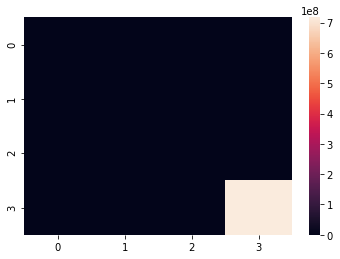

In [19]:
import seaborn as sns
sns.heatmap(tf)